# This notebook is used for visualizing the 3D motion capture data

In [1]:
# !pip install -qq transforms3d

In [105]:
import os, sys
# !git clone -q https://github.com/CalciferZh/AMCParser

In [106]:
sys.path.append('AMCParser')
import amc_parser as amc

In [107]:
%matplotlib inline
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [108]:
BASE_DIR = Path('..') / 'new pq' / 'allasfamc' / 'all_asfamc'
# BASE_DIR = "D:\\University\\semester_7\\FYP\\all_asfamc"
print(BASE_DIR)
datasets_df = pd.DataFrame({'path': list(BASE_DIR.glob('subjects/*/*.amc'))})
datasets_df['Subject'] = datasets_df['path'].map(lambda x: x.parent.stem)
datasets_df['Activity'] = datasets_df['path'].map(lambda x: x.stem.split('_')[-1].lower())
datasets_df['asf_path'] = datasets_df['path'].map(lambda x: x.parent / (x.parent.stem + '.asf'))
datasets_df['asf_path'] = datasets_df['path'].map(lambda x: x.parent / (x.parent.stem + '.asf'))

datasets_df.sample(3)

..\new pq\allasfamc\all_asfamc


,path,Subject,Activity,asf_path
1465,..\new pq\allasfamc\all_asfamc\subjects\31\31_...,31,05,..\new pq\allasfamc\all_asfamc\subjects\31\31.asf
2499,..\new pq\allasfamc\all_asfamc\subjects\94\94_...,94,02,..\new pq\allasfamc\all_asfamc\subjects\94\94.asf
1821,..\new pq\allasfamc\all_asfamc\subjects\64\64_...,64,26,..\new pq\allasfamc\all_asfamc\subjects\64\64.asf


In [109]:
(datasets_df)

,path,Subject,Activity,asf_path
0,..\new pq\allasfamc\all_asfamc\subjects\01\01_...,01,01,..\new pq\allasfamc\all_asfamc\subjects\01\01.asf
1,..\new pq\allasfamc\all_asfamc\subjects\01\01_...,01,02,..\new pq\allasfamc\all_asfamc\subjects\01\01.asf
2,..\new pq\allasfamc\all_asfamc\subjects\01\01_...,01,03,..\new pq\allasfamc\all_asfamc\subjects\01\01.asf
3,..\new pq\allasfamc\all_asfamc\subjects\01\01_...,01,04,..\new pq\allasfamc\all_asfamc\subjects\01\01.asf
4,..\new pq\allasfamc\all_asfamc\subjects\01\01_...,01,05,..\new pq\allasfamc\all_asfamc\subjects\01\01.asf
...,...,...,...,...
2509,..\new pq\allasfamc\all_asfamc\subjects\94\94_...,94,12,..\new pq\allasfamc\all_asfamc\subjects\94\94.asf
2510,..\new pq\allasfamc\all_asfamc\subjects\94\94_...,94,13,..\new pq\allasfamc\all_asfamc\subjects\94\94.asf
2511,..\new pq\allasfamc\all_asfamc\subjects\94\94_...,94,14,..\new pq\allasfamc\all_asfamc\subjects\94\94.asf
2512,..\new pq\allasfamc\all_asfamc\subjects\94\94_...,94,15,..\new pq\allasfamc\all_asfamc\subjects\94\94.asf


In [110]:
datasets_df[['Subject', 'Activity']].describe()

,Subject,Activity
count,2514,2514
unique,112,96
top,79,01
freq,96,110


In [111]:
test_rec = datasets_df.iloc[8]
print(test_rec)

path        ..\new pq\allasfamc\all_asfamc\subjects\01\01_...
Subject                                                    01
Activity                                                   09
asf_path    ..\new pq\allasfamc\all_asfamc\subjects\01\01.asf
Name: 8, dtype: object


In [112]:
joints = amc.parse_asf(test_rec['asf_path'])
motions = amc.parse_amc(test_rec['path'])

In [113]:
motions[0]

{'root': [11.6562, 17.3847, 13.933, 70.2373, -88.5734, -66.0737],
 'lowerback': [9.03896, 0.18036, -3.40634],
 'upperback': [3.38239, -0.116974, 1.72859],
 'thorax': [-1.54683, -0.128181, 3.72288],
 'lowerneck': [-3.29785, -6.30576, -6.79116],
 'upperneck': [11.6938, -8.702, 4.91597],
 'head': [4.55485, -4.36588, 2.14808],
 'rclavicle': [1.63997e-15, -3.08116e-15],
 'rhumerus': [-31.2129, -8.39917, -81.2028],
 'rradius': [27.5902],
 'rwrist': [-9.54867],
 'rhand': [-14.216, -23.7809],
 'rfingers': [7.12502],
 'rthumb': [11.9208, -53.4215],
 'lclavicle': [1.63997e-15, -3.08116e-15],
 'lhumerus': [-24.9586, 7.52879, 82.9351],
 'lradius': [41.5746],
 'lwrist': [5.32704],
 'lhand': [-20.4594, -4.0701],
 'lfingers': [7.12502],
 'lthumb': [5.89634, 25.8279],
 'rfemur': [-36.6646, -0.738274, 21.747],
 'rtibia': [27.4315],
 'rfoot': [-4.25994, -11.9821],
 'rtoes': [5.58072],
 'lfemur': [5.0846, 5.16757, -21.019],
 'ltibia': [20.765],
 'lfoot': [-24.9657, -2.73594],
 'ltoes': [6.31424]}

In [114]:
M = np.load('motion.npy')

In [115]:
# M[40] == M[1]

In [116]:
# M[0]

In [117]:
# import numpy as np

# def convert_array_to_dict(array):
#     keys = ['root', 'lowerback', 'upperback', 'thorax', 'lowerneck', 'upperneck', 'head', 'rclavicle', 
#             'rhumerus', 'rradius', 'rwrist', 'rhand', 'rfingers', 'rthumb', 'lclavicle', 'lhumerus', 
#             'lradius', 'lwrist', 'lhand', 'lfingers', 'lthumb', 'rfemur', 'rtibia', 'rfoot', 'rtoes', 
#             'lfemur', 'ltibia', 'lfoot', 'ltoes']
    
#     lengths = [6, 3, 3, 3, 3, 3, 3, 2, 3, 1, 1, 2, 1, 2, 2, 3, 1, 1, 2, 1, 2, 3, 1, 2, 1, 3, 1, 2, 1]
    
#     result = {}
#     index = 0
    
#     for key, length in zip(keys, lengths):
#         result[key] = array[index:index+length].tolist()
#         index += length
        
#     return result

# # Example usage
# array = M

# # Convert the array
# converted_dict = convert_array_to_dict(array)
# # print(converted_dict)

# # Example usage with M
# # M = np.random.rand(41, 93)  # Replace this with your actual data
# converted_list = [convert_array_to_dict(row) for row in M]
# print(converted_list)


In [118]:
converted_list

[{'root': [0.0,
   0.0,
   0.0,
   6.395263195037842,
   -10.172550201416016,
   4.671161651611328],
  'lowerback': [6.806244373321533, -51.547794342041016, 6.799178123474121],
  'upperback': [6.492732048034668, -88.2496566772461, -7.573120594024658],
  'thorax': [6.084551811218262, -94.9958724975586, 3.752697229385376],
  'lowerneck': [5.929859161376953, -94.56726837158203, 10.230002403259277],
  'upperneck': [-8.873074531555176, -8.749663352966309, 4.671170234680176],
  'head': [-7.583858013153076, -50.50015640258789, 8.968122482299805],
  'rclavicle': [-7.701685428619385, -87.1630630493164],
  'rhumerus': [-7.477040767669678, -11.133553504943848, -94.23206329345703],
  'rradius': [4.448274612426758],
  'rwrist': [-12.712358474731445],
  'rhand': [-94.5455551147461, 11.294346809387207],
  'rfingers': [0.41833436489105225],
  'rthumb': [12.43930435180664, -1.333526849746704],
  'lclavicle': [0.7110937237739563, 24.86566162109375],
  'lhumerus': [-1.7751216888427734, 1.175436019897461,

In [68]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Assuming joints and motions are defined
# # joints = ...
# # motions = ...

# # Number of frames to display in the subplot
# num_frames = len(motions)

# # Determine the grid size for subplots
# num_cols = 5
# num_rows = int(np.ceil(num_frames / num_cols))

# fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))

# for i, ax in enumerate(axes.flat):
#     if i < num_frames:
#         joints['root'].set_motion(motions[i])
#         joints['root'].draw(ax)
#     else:
#         ax.axis('off')  # Turn off axis for empty subplots

# plt.tight_layout()
# plt.show()


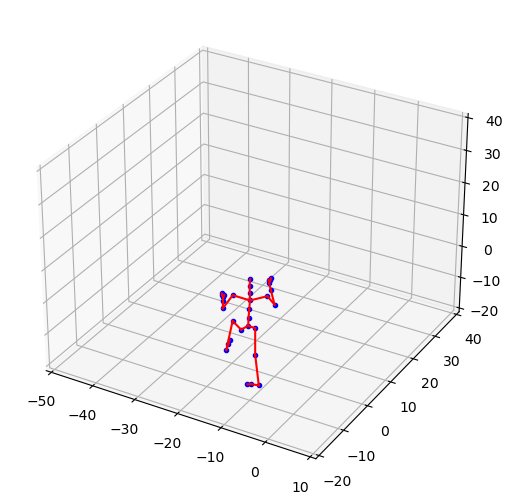

In [137]:
frame_idx = np.random.choice(range(len(motions)))
joints['root'].set_motion(motions[frame_idx])
joints['root'].draw()

In [122]:
import numpy as np
M = np.load('motion.npy')
M.shape

(41, 93)

In [124]:
from IPython.display import FileLink
from matplotlib.animation import FuncAnimation
fig = plt.figure()
ax = Axes3D(fig)

def draw_frame(i):
    ax.cla()
    ax.set_xlim3d(-50, 10)
    ax.set_ylim3d(-20, 40)
    ax.set_zlim3d(-20, 40)
    joints['root'].set_motion(motions[i])
    c_joints = joints['root'].to_dict()
    xs, ys, zs = [], [], []
    for joint in c_joints.values():
      xs.append(joint.coordinate[0, 0])
      ys.append(joint.coordinate[1, 0])
      zs.append(joint.coordinate[2, 0])
    ax.plot(zs, xs, ys, 'b.')

    for joint in c_joints.values():
      child = joint
      if child.parent is not None:
        parent = child.parent
        xs = [child.coordinate[0, 0], parent.coordinate[0, 0]]
        ys = [child.coordinate[1, 0], parent.coordinate[1, 0]]
        zs = [child.coordinate[2, 0], parent.coordinate[2, 0]]
        ax.plot(zs, xs, ys, 'r')
        
out_path = 'simple_animation3.gif'



FuncAnimation(fig, draw_frame, range(0, len(motions), 10)).save(out_path, 
                                                  bitrate=8000,
                                                  fps=8)
plt.close('all')
FileLink(out_path)

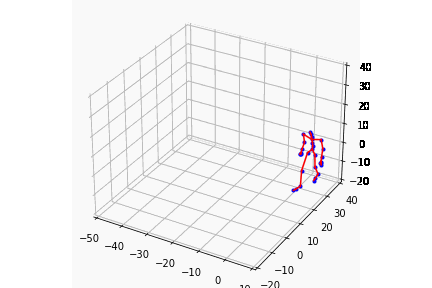

In [21]:
from IPython.display import Image, display

# Path to your GIF file
gif_path = 'simple_animation3.gif'

# Display the GIF
display(Image(filename=gif_path))


In [24]:
def get_joint_pos_dict(c_joints, c_motion):
    c_joints['root'].set_motion(c_motion)
    out_dict = {}
    for k1, v1 in c_joints['root'].to_dict().items():
        for k2, v2 in zip('xyz', v1.coordinate[:, 0]):
            out_dict['{}_{}'.format(k1, k2)] = v2
    return out_dict
motion_df = pd.DataFrame([get_joint_pos_dict(joints, c_motion) for c_motion in motions])
motion_df.to_csv('motion.csv', index=False)
motion_df.sample(3)

,root_x,root_y,root_z,lhipjoint_x,lhipjoint_y,lhipjoint_z,lfemur_x,lfemur_y,lfemur_z,ltibia_x,...,rwrist_z,rhand_x,rhand_y,rhand_z,rfingers_x,rfingers_y,rfingers_z,rthumb_x,rthumb_y,rthumb_z
1761,9.25638,15.9130,9.9529,8.078417,13.833714,9.684584,7.028914,7.275193,7.016536,7.093982,...,1.867638,13.349831,18.187806,1.318821,13.479120,18.316874,0.851351,13.011652,18.243322,1.199167
503,8.62354,16.4344,10.3532,9.784751,14.595183,11.378817,11.059046,8.661171,15.173261,11.260063,...,14.488328,3.507935,15.147730,14.767310,3.249336,14.790146,15.006398,3.768036,15.065576,15.006814
1248,9.01470,16.3444,48.2453,7.893752,14.223931,48.071792,7.336892,8.299985,44.092984,7.519605,...,40.016104,14.004772,18.738993,39.489316,14.181905,18.858585,39.035197,13.683011,18.821270,39.342808


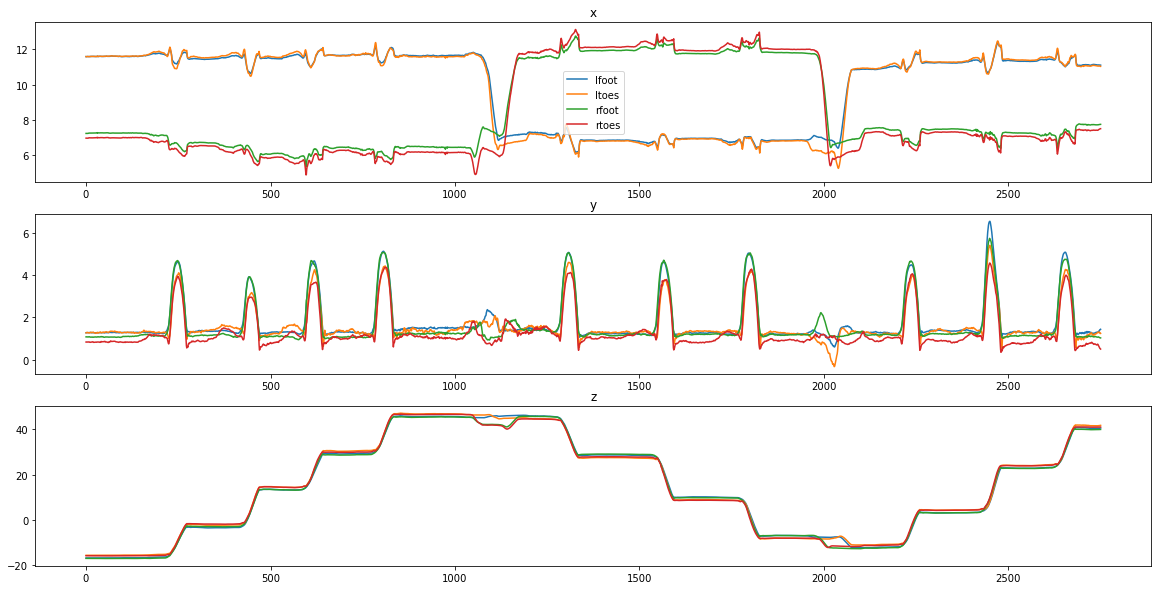

In [25]:
fig, m_axs = plt.subplots(3, 1, figsize=(20, 10))
for c_x, c_ax in zip('xyz', m_axs):
    for joint_name in joints.keys():
        if ('foot' in joint_name) or ('toes' in joint_name):
            c_ax.plot(motion_df['{}_{}'.format(joint_name, c_x)], label=joint_name)
    c_ax.set_title(c_x);
m_axs[0].legend()